# Basic Example

## Importing packages

In [1]:
import af2_analysis
from af2_analysis import clustering
from af2_analysis import docking, analysis
%matplotlib inline

/home/murail/miniforge3/envs/docking/lib/python3.10/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


## Importing Alpahfold Data 

In [2]:
DATA_PATH = '../../../src/af2_analysis/test/inputs/beta_amyloid_dimer_cf_1.5.5/'
my_data = af2_analysis.Data(DATA_PATH)
my_data.df.head()

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

,query,seed,model,weight,recycle,pLDDT,pTM,ipTM,ranking_confidence,pdb,relaxed_pdb,json
0,beta_amyloid_dimer_d2fa3_0,0,1,alphafold2_multimer_v3,9,38.8,0.159,0.0812,0.09676,../../../src/af2_analysis/test/inputs/beta_amy...,None,../../../src/af2_analysis/test/inputs/beta_amy...
1,beta_amyloid_dimer_d2fa3_0,0,2,alphafold2_multimer_v3,16,35.2,0.130,0.0685,0.08080,../../../src/af2_analysis/test/inputs/beta_amy...,None,../../../src/af2_analysis/test/inputs/beta_amy...
2,beta_amyloid_dimer_d2fa3_0,0,3,alphafold2_multimer_v3,3,44.5,0.250,0.1610,0.17880,../../../src/af2_analysis/test/inputs/beta_amy...,None,../../../src/af2_analysis/test/inputs/beta_amy...
3,beta_amyloid_dimer_d2fa3_0,0,4,alphafold2_multimer_v3,5,44.2,0.234,0.1580,0.17320,../../../src/af2_analysis/test/inputs/beta_amy...,None,../../../src/af2_analysis/test/inputs/beta_amy...
4,beta_amyloid_dimer_d2fa3_0,0,5,alphafold2_multimer_v3,5,64.2,0.568,0.5410,0.54640,../../../src/af2_analysis/test/inputs/beta_amy...,None,../../../src/af2_analysis/test/inputs/beta_amy...


## show 3D structure

In [3]:
view = my_data.show_3d(my_data.df['ipTM'].idxmax())
view

NGLWidget()

In [4]:
import nglview
nglview.write_html('../_static/dimer.html', [view])

In [5]:
from IPython.display import IFrame

In [6]:
IFrame(src='../_static/dimer.html', width=600, height=300)

## Computing scores


In [7]:
#compute_pdockq
analysis.pdockq(my_data)
#compute_pdockq2
analysis.pdockq2(my_data)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [8]:
#extract_pae_pep
docking.pae_pep(my_data)
#compute_pdockq2_lig
docking.pdockq2_lig(my_data)
#compute_LIS_pep
docking.LIS_pep(my_data)
#extract_plddt_pep
docking.plddt_pep(my_data)


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [9]:
my_data.df.head()

,query,seed,model,weight,recycle,pLDDT,pTM,ipTM,ranking_confidence,pdb,...,pdockq,pdockq2_A,pdockq2_B,PAE_pep_rec,PAE_rec_pep,pdockq2_lig,LIS,LIS_rec_pep,LIS_pep_rec,plddt_pep
0,beta_amyloid_dimer_d2fa3_0,0,1,alphafold2_multimer_v3,9,38.8,0.159,0.0812,0.09676,../../../src/af2_analysis/test/inputs/beta_amy...,...,0.033217,0.012064,0.011992,21.026196,20.984252,0.011992,"[[0.44785182119205297, 0.11038825757575756], [...",0.107481,0.110388,38.685476
1,beta_amyloid_dimer_d2fa3_0,0,2,alphafold2_multimer_v3,16,35.2,0.130,0.0685,0.08080,../../../src/af2_analysis/test/inputs/beta_amy...,...,0.020508,0.010768,0.010624,22.760130,22.746667,0.010624,"[[0.4598769470404984, 0.10359090909090911], [0...",0.103333,0.103591,34.902857
2,beta_amyloid_dimer_d2fa3_0,0,3,alphafold2_multimer_v3,3,44.5,0.250,0.1610,0.17880,../../../src/af2_analysis/test/inputs/beta_amy...,...,0.029995,0.014431,0.014287,19.228260,19.257993,0.014287,"[[0.48629706152433433, 0.08237745098039216], [...",0.084944,0.082377,44.560238
3,beta_amyloid_dimer_d2fa3_0,0,4,alphafold2_multimer_v3,5,44.2,0.234,0.1580,0.17320,../../../src/af2_analysis/test/inputs/beta_amy...,...,0.029711,0.016365,0.016360,19.363730,19.288968,0.016360,"[[0.4926578192252511, 0.10013468013468015], [0...",0.099600,0.100135,44.120952
4,beta_amyloid_dimer_d2fa3_0,0,5,alphafold2_multimer_v3,5,64.2,0.568,0.5410,0.54640,../../../src/af2_analysis/test/inputs/beta_amy...,...,0.120942,0.185380,0.168438,11.190368,11.075300,0.168438,"[[0.5450712678169541, 0.41792701625268325], [0...",0.417809,0.417927,64.091667


In [10]:
my_data.df.columns

Index(['query', 'seed', 'model', 'weight', 'recycle', 'pLDDT', 'pTM', 'ipTM',
       'ranking_confidence', 'pdb', 'relaxed_pdb', 'json', 'pdockq',
       'pdockq2_A', 'pdockq2_B', 'PAE_pep_rec', 'PAE_rec_pep', 'pdockq2_lig',
       'LIS', 'LIS_rec_pep', 'LIS_pep_rec', 'plddt_pep'],
      dtype='object')

## Plots

### Plddt plot

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Residue', ylabel='predicted LDDT'>)

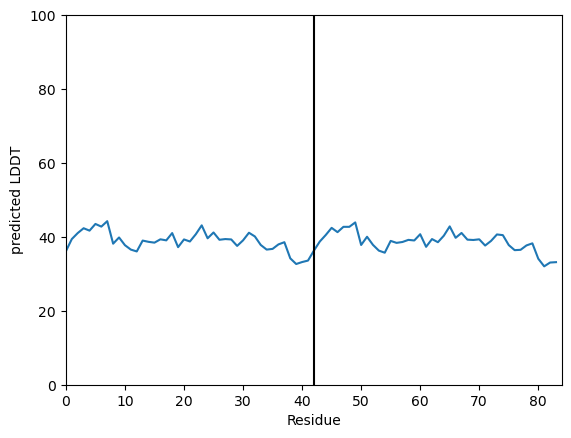

In [11]:
# Model 1
my_data.plot_plddt([0])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Residue', ylabel='predicted LDDT'>)

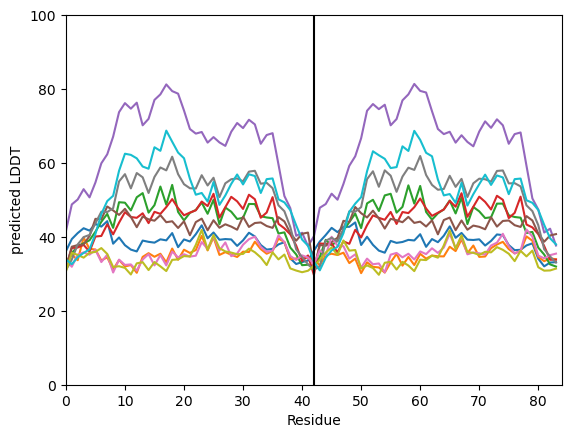

In [12]:
# Model 1 to 
my_data.plot_plddt(range(10))

### Plddt pae

(<Figure size 640x480 with 2 Axes>, <Axes: >)

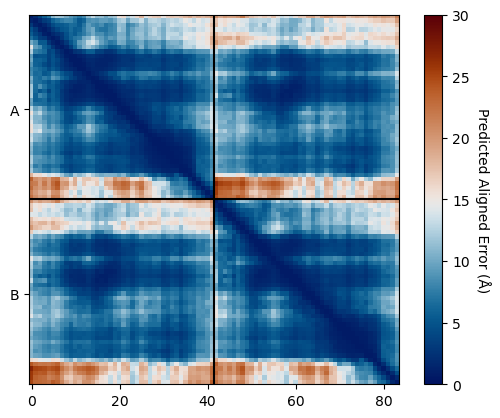

In [13]:
# Best Model
my_data.plot_pae(my_data.df['ipTM'].idxmax())

(<Figure size 640x480 with 2 Axes>, <Axes: >)

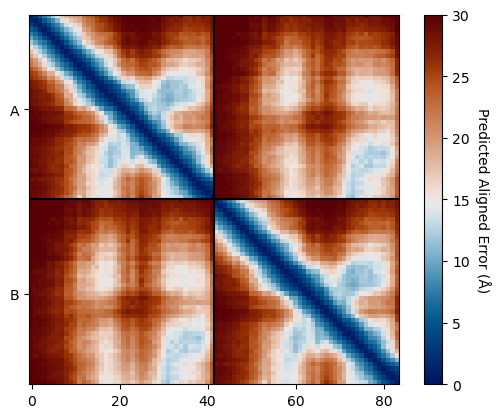

In [14]:
# Worst Model
my_data.plot_pae(my_data.df['ipTM'].idxmin())

## Clustering

/home/murail/miniforge3/envs/docking/lib/python3.10/site-packages/MDAnalysis/coordinates/base.py:725: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

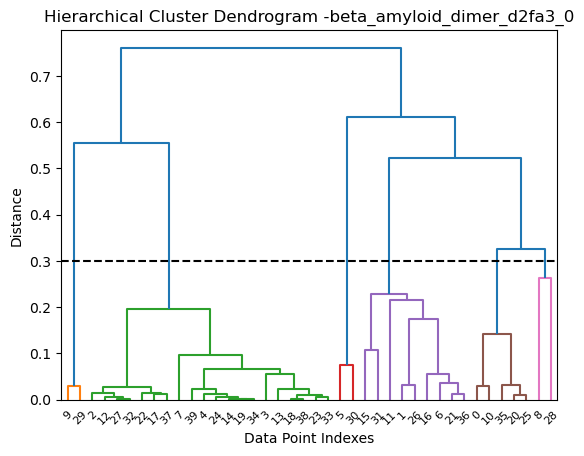

In [15]:
clustering.hierarchical(my_data.df, threshold=0.3, rmsd_scale=True)

## Multidimensional scaling representation

<Axes: xlabel='MDS 1', ylabel='MDS 2'>

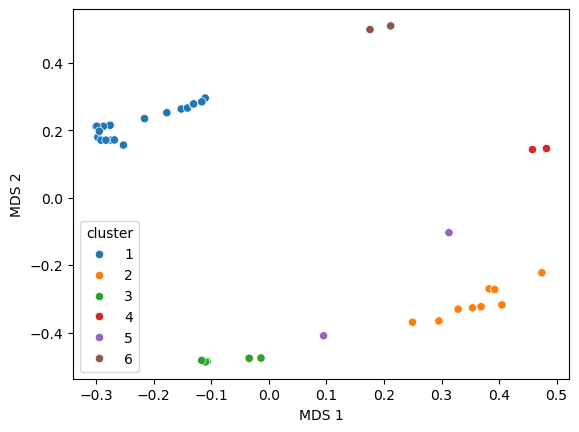

In [18]:
import seaborn as sns
sns.scatterplot(data=my_data.df, x='MDS 1', y='MDS 2', hue='cluster')